# Machine Learning from Disaster - Titanic Case

#### Example of machine learning application to analyze disasters.
In this case study, we'll explore how to predict who in the Titanic disaster could have survived or died, given data such as income, age, gender, and more.
All data is taken from the source kaggle.com/c/titanic

Study Purpose:
Analyze which machine learning method achieves the best prediction of survivors on Titanic

Author:
Lucas Oliveira 

## 1 - Importing main Libraries

In [1]:
#The Libraries that we will work with
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

from datetime import date

import warnings
warnings.simplefilter("ignore")

## 2 - loading the Data Base

In [2]:
#defining a routine to load the data set:
def loaddataset(filelocation):
    data = pd.read_csv(filelocation)
    print('______________Data set head is:___________')
    print(data.head(5))
    print('______________The number of col, and lines in the data set is:',data.shape)
    print('______________the numeber of null values in the data is:',data.isna().sum().sum())
    print('______________Data Type in the data set__________')
    print(data.dtypes)
    print('______________Data description in the data set__________')    
    print(data.describe())
    return data

In [3]:
#Loading Gender_Submition:
gender_submission_location = r'C:\Users\l798168\OneDrive - Cargill Inc\Python - Projetos\Titanic_Machine Learning from Disaster\gender_submission.csv'

#Loading Train_DataFrame:
df_train_location = r'C:\Users\l798168\OneDrive - Cargill Inc\Python - Projetos\Titanic_Machine Learning from Disaster\train.csv'

#Loading Train_DataFrame:
df_test_location = r'C:\Users\l798168\OneDrive - Cargill Inc\Python - Projetos\Titanic_Machine Learning from Disaster\test.csv'

In [4]:
#creation the dataset gender_submitssion
gender_submission = loaddataset(gender_submission_location)

______________Data set head is:___________
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
______________The number of col, and lines in the data set is: (418, 2)
______________the numeber of null values in the data is: 0
______________Data Type in the data set__________
PassengerId    int64
Survived       int64
dtype: object
______________Data description in the data set__________
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


In [5]:
#creation the dataset for trainnig
df_train = loaddataset(df_train_location)

______________Data set head is:___________
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0    

In [6]:
#creation the dataset for trainnig
df_test = loaddataset(df_test_location)

______________Data set head is:___________
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
______________The number of col, and lines in the data set is: (418, 11)
______________the numeber of null values in the data is: 414


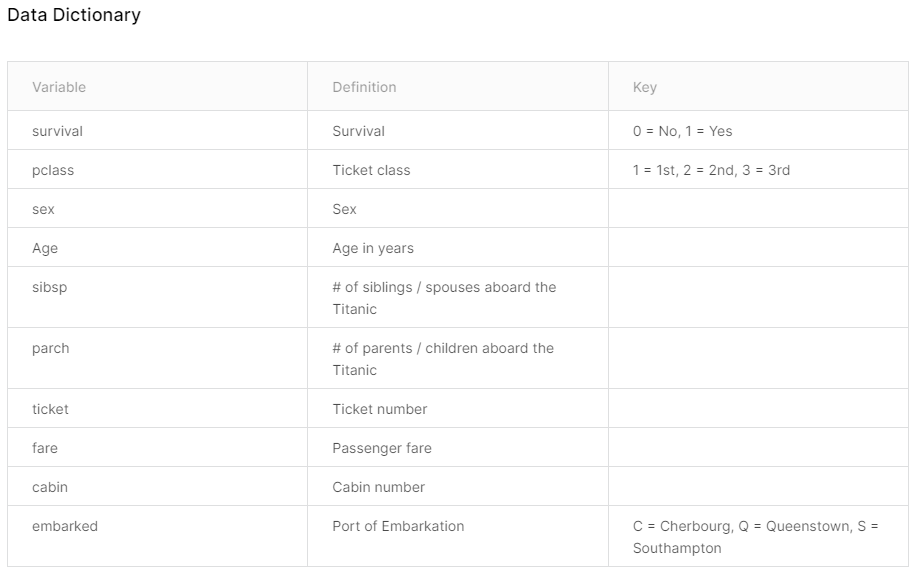

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

#### Results Analysis: we have 2 datasets for this analysis and one example of df that we would subbmit as resposnse of our code:
###### 1 - Gender_submission containing passengers from number XXX to XXX with the answer if he lived or died (is the objective of this study)
######  2 - we also have the train DF, with the passangers from X to Y. It will be used to train our code
###### 3 - The last Df is the test , it contains passengers from X to Y number, it with the passanger to test our code

## 2 - Exploring the train data

In [7]:
#Understading the train head()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Defining a function to facilitate the plot:

def categorical_comp_plot(x,y,hue,title,data):
    sns.set_style(style=None)
    sns.set(font_scale = 1.2)
    fig = sns.barplot(x = x, y = y, hue = hue, data=data, palette="ch:.25")
    plt.title(title, loc = 'left', fontsize = 15)
    plt.show(fig)
    return fig

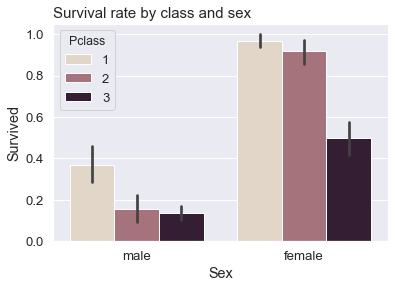

In [9]:
#Comparting the Class and Sex Survival Rate:
data = df_train
x= 'Sex'
y= 'Survived'
hue= 'Pclass'
title = 'Survival rate by class and sex'
categorical_comp_plot (x,y,hue,title,data)

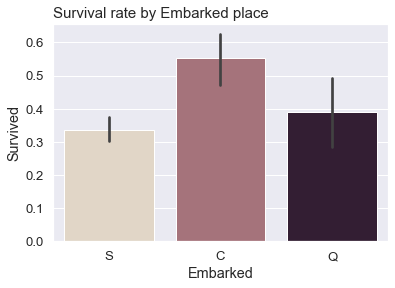

In [10]:
#Comparting the Embarked place:
data = df_train
x= 'Embarked'
y= 'Survived'
hue= None
title = 'Survival rate by Embarked place'
categorical_comp_plot (x,y,hue,title,data)

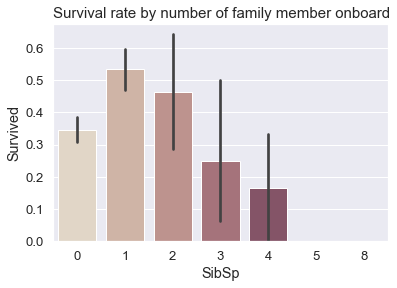

In [11]:
#Comparting the Embarked place:
data = df_train
x= 'SibSp'
y= 'Survived'
hue= None
title = 'Survival rate by number of family member onboard'
categorical_comp_plot (x,y,hue,title,data);

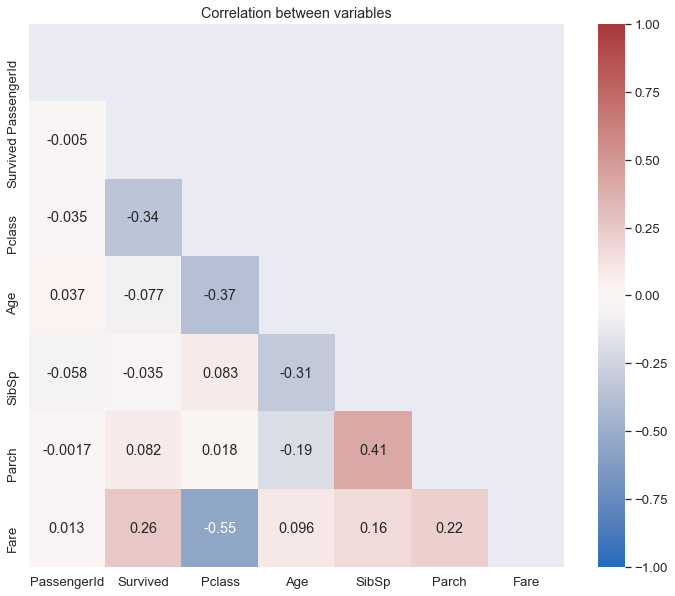

In [12]:
#Analisando acorrelação entre temos dos Xs

data_corr = df_train.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(data_corr,vmin = -1, vmax = 1, cmap = "vlag", annot=True ,mask=mask)

ax.set_title('Correlation between variables');

#### Results Analysis: it seems that mans have less chance to survive, also the third class. We don't see high correaltion between the variables

## 3 - Prediction Model 

In [13]:
# Creating a Data Frame to colect the results:

In [14]:
results = pd.DataFrame(columns = ['accuracy'] )

In [15]:
## Planning the predicion model:
# 1 - Knn (Rtirar Colunas que não vou utilizar, normalizar restante de dados)
# 2 - decision tree 
# 3 - Random Forrest 
## USAR KFOLD

### 3.1 Preparing the DataSet 
#### We will prepare 2 data set, a normalized one for KNN, and a not normalized for logistical regression and Decision tree

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#creating the new DF for Knn Model
df_train_preprocessed = df_train.copy()
df_train_preprocessed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Verifying if there is any NAN 

In [18]:
#Here we would like to know if there is any NaN in the data. Thats important because in the test dataset it can happen too
print('______________the numeber of null values in the data is:',df_train_preprocessed.isna().sum())

______________the numeber of null values in the data is: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We will have to make the Age a Dummy, so we can use it even with NaN. For thism we will classify the ages by the following dictionary

#### Turning Age in a Group variable

In [19]:
# Preparing the Age data Set:
df_train_preprocessed = df_train.copy()

#Creating a Tag for ages:
Child_limit_age = 12
Teen_limit_age = 19
Adult_limit_age = 60

# Tags:
# 1 == Child
# 2 == Teen
# 3 == Adult
# 4 == Senior
# 5 == Unknow

df_train_preprocessed.loc[df_train_preprocessed.Age <= 16,'Age'] = 1
df_train_preprocessed.loc[(df_train_preprocessed.Age > 16) & (df_train_preprocessed.Age <= 19),'Age'] = 2
df_train_preprocessed.loc[(df_train_preprocessed.Age > 19) & (df_train_preprocessed.Age <= 60),'Age'] = 3
df_train_preprocessed.loc[(df_train_preprocessed.Age > 60),'Age'] = 4
df_train_preprocessed.loc[(df_train_preprocessed.Age.isna()),'Age'] = 5


print(df_train_preprocessed.Age.unique())
print(df_train_preprocessed.Survived.unique())
print(df_train.Survived.unique())

[3. 5. 1. 2. 4.]
[0 1]
[0 1]


Now we have the DF with no NaN in the Age category

#### Processing the other columns that we dont need, or we need to make it dummy 

In [20]:
#Preparing the DF

#Chaging the index for passenger Id
df_train_preprocessed = df_train_preprocessed.set_index('PassengerId')

#Dropin the name, Ticket, cabin,
df_train_preprocessed = df_train_preprocessed.drop(columns = ['Name', 'Ticket', 'Cabin',])

#Turning Pclass, Sex, Embarked in Dummyes
df_train_preprocessed = pd.get_dummies(df_train_preprocessed, columns = ['Pclass', 'Sex', 'Embarked','Age'])

print('______________the numeber of null values in the data is:',df_train_preprocessed.isna().sum())

______________the numeber of null values in the data is: Survived      0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Age_1.0       0
Age_2.0       0
Age_3.0       0
Age_4.0       0
Age_5.0       0
dtype: int64


### Df for tranning is complete:

In [21]:
#the final 
df_train_preprocessed.head()
df_train_preprocessed.Survived.unique()
df_train_preprocessed.describe()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.523008,0.381594,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.722783,0.112233,0.071829,0.592593,0.024691,0.198653
std,0.486592,1.102743,0.806057,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.447876,0.315831,0.258350,0.491628,0.155270,0.399210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Creating a normalized Test Df

In [22]:
#creating an function for norm.
def nomalizer(df,column_name):
    column_to_be_normalized = column_name
    df[column_to_be_normalized] = df[column_to_be_normalized]/(df[column_to_be_normalized].max()-df[column_to_be_normalized].min())
    return df


In [23]:
df_train_preprocessed_normalized = df_train_preprocessed.copy()

#normalizing - Fare
df_train_preprocessed_normalized = nomalizer(df_train_preprocessed_normalized,'Fare')

#normalizing - SibSp
df_train_preprocessed_normalized = nomalizer(df_train_preprocessed_normalized,'SibSp')

#normalizing - Parch
df_train_preprocessed_normalized = nomalizer(df_train_preprocessed_normalized,'Parch')




#column_to_be_normalized = 'Fare'
#df_train_preprocessed_normalized[column_to_be_normalized] = df_train_preprocessed_normalized[column_to_be_normalized]/(df_train_preprocessed_normalized[column_to_be_normalized].max()-df_train_preprocessed_normalized[column_to_be_normalized].min())

In [24]:
# THe final nomalized df
df_train_preprocessed_normalized.describe()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.065376,0.063599,0.062858,0.242424,0.206510,0.551066,0.352413,0.647587,0.188552,0.086420,0.722783,0.112233,0.071829,0.592593,0.024691,0.198653
std,0.486592,0.137843,0.134343,0.096995,0.428790,0.405028,0.497665,0.477990,0.477990,0.391372,0.281141,0.447876,0.315831,0.258350,0.491628,0.155270,0.399210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3.0.1 - Creating the Train and Test model for KNN

In [25]:
#importing the Train_test_split
from sklearn.model_selection import train_test_split

#creating a copy of the Df
df_train_knn = df_train_preprocessed_normalized.copy()


#Seeding the split
SEED = 20

#Test subset size
test_size = 0.15

#Separando Xs e Ys:
y = df_train_knn[df_train_knn.columns[:1]] #colocando até qual coluna são as entradas (X)
x = df_train_knn[df_train_knn.columns[1:]]  #colocando qual coluna é a saída (Y)
#Plotando xs e Ys
print(f'___________x = {x.head(2)}')
print(f'___________y = {y.head(2)}')

#Separando em banco de dados de treino e banco de dados de teste

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = test_size,random_state = SEED )

print(f'{test_size } do dado será utilizado para teste')
print(f'tamanho de X = {x.shape} , Tamanho de Y = {y.shape} , Tamanho de X de treino = {X_train.shape} , Tamanho de X de teste = {X_test.shape} ,Tamanho de Y test{y_test.shape}')

___________x =              SibSp  Parch      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  \
PassengerId                                                                     
1            0.125    0.0  0.014151         0         0         1           0   
2            0.125    0.0  0.139136         1         0         0           1   

             Sex_male  Embarked_C  Embarked_Q  Embarked_S  Age_1.0  Age_2.0  \
PassengerId                                                                   
1                   1           0           0           1        0        0   
2                   0           1           0           0        0        0   

             Age_3.0  Age_4.0  Age_5.0  
PassengerId                             
1                  1        0        0  
2                  1        0        0  
___________y =              Survived
PassengerId          
1                   0
2                   1
0.15 do dado será utilizado para teste
tamanho de X = (891, 16) , Tamanho de

#### 3.0.2 - Creating the KNN Model

In [26]:
#The Libraries that we will work with

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def knn_model(X_train,y_train,X_test,y_test,n_neighbors=3):
    
    # model Inputs:
    Model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # What are we measuring [0,1]
    display_labels = ['Not Survived', 'Survived']
    
    
    #fitting model:
    Model.fit(X_train,y_train)
    
    #Getting the y predicts
    y_pred = Model.predict(X_test)
    
    #accuracyknn
    accuracyknn = accuracy_score(y_test, y_pred)
    
    #Printing some resutls:
    print('_______________________________________________________________')
    print(' ')
    print(f' the accuracy of the model is ____ {accuracyknn}')
    print(' ')
    print('__________________Classification_Report________________________')
    print(classification_report(y_test, y_pred))
    #print('_____________________Confusion Matrix__________________________')
    #print(confusion_matrix(y_test, y_pred))
       
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=display_labels);
    disp.plot(cmap = 'viridis')
    plt.grid(False)
    plt.title('Confusion matrix of the classifier')
    #plt.xlabel('Prediction')
    
    print(' _______________________________________')
    print(' ')
    print('    Confusion Matrix for Knn Model')
    print(' _______________________________________')
    plt.show()
    print("KNN accuracy")
    print(accuracyknn)
    return (accuracyknn)


_______________________________________________________________
 
 the accuracy of the model is ____ 0.8134328358208955
 
__________________Classification_Report________________________
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        84
           1       0.86      0.60      0.71        50

    accuracy                           0.81       134
   macro avg       0.83      0.77      0.78       134
weighted avg       0.82      0.81      0.80       134

 _______________________________________
 
    Confusion Matrix for Knn Model
 _______________________________________


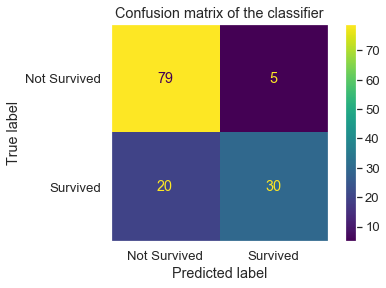

KNN accuracy
0.8134328358208955


In [27]:
#_____MODEL______
knn_accuracy = knn_model(X_train,y_train,X_test,y_test,14)

In [28]:
# Getting the result:
result_knn = pd.DataFrame( {'accuracy' : knn_accuracy }, index = ['knn'])
results = results.append(result_knn)
results.head()

,accuracy
knn,0.813433


### 3.1 Logistic Regression Model
#### 3.1.1 - preprocessing: preparing the DataSet

In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#creating the new DF for a tests that dont need normalized data:
df_train_notnomalized = df_train
df_train_notnomalized.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
#Preparing the DF

#Chaging the index for passenger Id
df_train_notnomalized = df_train_notnomalized.set_index('PassengerId')

#Dropin the name, Ticket, cabin,
df_train_notnomalized = df_train_notnomalized.drop(columns = ['Name', 'Ticket', 'Cabin'])

#Dropin the Nan
df_train_notnomalized = df_train_notnomalized.dropna()

#Turning Pclass, Sex, Embarked in Dummyes
df_train_notnomalized = pd.get_dummies(df_train_notnomalized, columns = ['Pclass', 'Sex', 'Embarked'])

#the final 
df_train_notnomalized.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


#### 3.1.2 - Splitting into test and train dataset

In [32]:
#importing the Train_test_split
from sklearn.model_selection import train_test_split

#Seeding the split
SEED = 20

#Test subset size
test_size = 0.15

#Separando Xs e Ys:
y = df_train_notnomalized[df_train_notnomalized.columns[:1]] #colocando até qual coluna são as entradas (X)
x = df_train_notnomalized[df_train_notnomalized.columns[1:]]  #colocando qual coluna é a saída (Y)
#Plotando xs e Ys
print(f'___________x = {x.head(2)}')
print(f'___________y = {y.head(2)}')

#Separando em banco de dados de treino e banco de dados de teste

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = test_size,random_state = SEED )

print(f'{test_size} do dado será utilizado para teste')
print(f'tamanho de X = {x.shape} , Tamanho de Y = {y.shape} , Tamanho de X de treino = {X_train.shape} , Tamanho de X de teste = {X_test.shape} ,Tamanho de Y test{y_test.shape}')

___________x =               Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
PassengerId                                                              
1            22.0      1      0   7.2500         0         0         1   
2            38.0      1      0  71.2833         1         0         0   

             Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
PassengerId                                                            
1                     0         1           0           0           1  
2                     1         0           1           0           0  
___________y =              Survived
PassengerId          
1                   0
2                   1
0.15 do dado será utilizado para teste
tamanho de X = (712, 12) , Tamanho de Y = (712, 1) , Tamanho de X de treino = (605, 12) , Tamanho de X de teste = (107, 12) ,Tamanho de Y test(107, 1)


#### 3.1.3 - LogisticRegression Model 

In [33]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

reg.fit(X_train,y_train)
coeficientes_lineares = reg.coef_
termo_independete = reg.intercept_ 

print(f'Os coeficientes da regressão logistica da equação são {reg.coef_}')
print(f'o termo independete regressão Logistica é:  {reg.intercept_ }')

### Fazendo a predição do Modelo:

y_pred = reg.predict(X_test)


### Analisando o R^2 do modelo:
accuracy_logistic_regression = reg.score(X_train,y_train)

print( f'"Score" é: {accuracy_logistic_regression}' )

Os coeficientes da regressão logistica da equação são [[-0.04046804 -0.42582049 -0.06010744  0.00247896  1.34686482  0.08847847
  -0.88865492  1.56801811 -1.02132974  0.54388811 -0.17604979  0.17885005]]
o termo independete regressão Logistica é:  [0.78367057]
"Score" é: 0.7983471074380165


In [34]:
# Getting the results:
result_log_regression = pd.DataFrame( {'accuracy' : accuracy_logistic_regression }, index = ['Log_regression'])
results = results.append(result_log_regression)
results.head()

,accuracy
knn,0.813433
Log_regression,0.798347


### 3.2 Randon Tree Model
#### 3.2.1 - preprocessing: preparing the DataSet

a Acurácia do modelo é de:0.3082159720984028


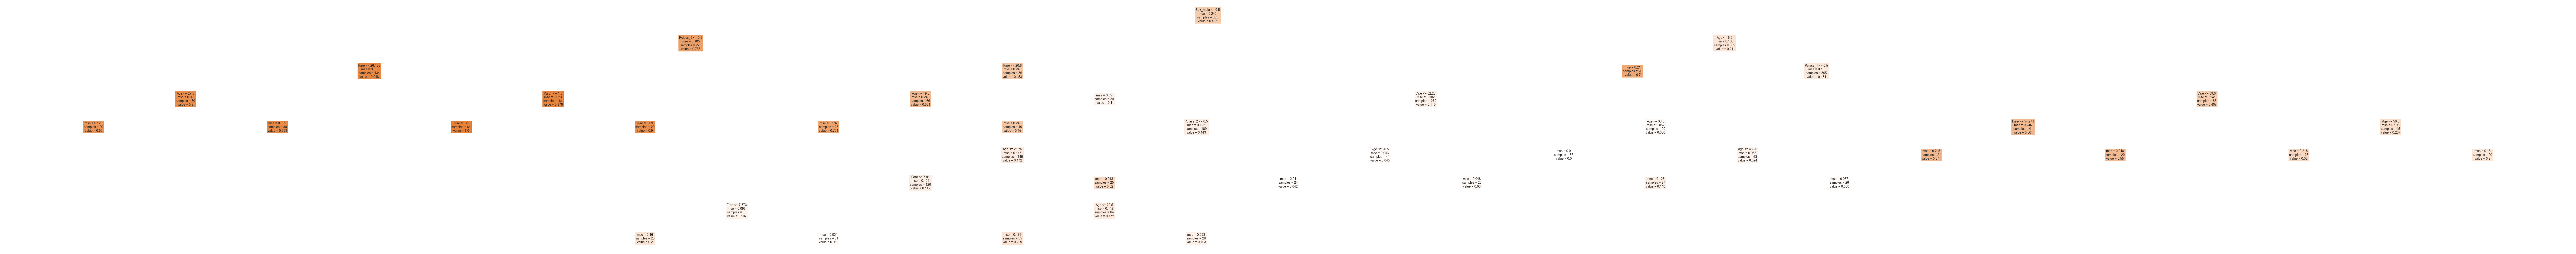

In [35]:
## Importando Biblioteca:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

### Propriedades da árvore de decisão
SEED = 20
Max_nos = 15
Min_conjunto_por_nos= 20

## Rodando o Modelo:
reg = DecisionTreeRegressor(max_depth=Max_nos, min_samples_leaf = Min_conjunto_por_nos )
reg.fit(X_train,y_train)

## Fazendo a Predição do Modelo:
y_pred = reg.predict(X_test)

## Avaliando o Score do Modelo
accuracy = reg.score(X_test, y_test)
print(f'a Acurácia do modelo é de:{accuracy}' )
### Imprimindo propriedades importantes do modelo:


### Plotando a árvore decisória
import matplotlib.pyplot as plt
from sklearn import tree
fig_name_save = "Árvore 1"
feature_names = list(X_test) #nome das categorias de X para serem plotadas


#plt.figure(figsize= 200,100)
plt.figure(figsize = (200,20));
tree.plot_tree(reg,filled=True, fontsize = 14, feature_names=feature_names)
plt.savefig(fig_name_save)


In [36]:
## Importando Biblioteca:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

### Propriedades da árvore de decisão
SEED = 20
Max_nos = 15
Min_conjunto_por_nos= 20

## Rodando o Modelo:
reg = DecisionTreeRegressor(max_depth=Max_nos, min_samples_leaf = Min_conjunto_por_nos )
reg.fit(X_train,y_train)

## Fazendo a Predição do Modelo:
y_pred = reg.predict(X_test)

## Avaliando o Score do Modelo
accuracy = reg.score(X_test, y_test)
print(f'a Acurácia do modelo é de:{accuracy}' )
### Imprimindo propriedades importantes do modelo:


a Acurácia do modelo é de:0.3072657594190962


In [37]:
Max_nos_inicial = 1
Max_nos_final = 10
min_conjuntos_por_nos_inicial = 1
min_conjuntos_por_nos_final = 20
min_conjuntos_por_nos_range = list(range(min_conjuntos_por_nos_inicial, min_conjuntos_por_nos_final))
Max_nos_range = list(range(Max_nos_inicial, Max_nos_final))

In [38]:
Responses_set = pd.DataFrame(columns = ['Acc' , 'max_depth','min_samples_leaf'])

for max_nos in Max_nos_range:
    for min_conjuntos in min_conjuntos_por_nos_range:
        reg = DecisionTreeRegressor(max_depth=max_nos, min_samples_leaf = min_conjuntos )
        reg.fit(X_train,y_train)

        ## Fazendo a Predição do Modelo:
        y_pred = reg.predict(X_test)

        ## Avaliando o Score do Modelo
        accuracy = reg.score(X_test, y_test)   
        actual_response = pd.DataFrame(data = [(accuracy, max_nos, min_conjuntos)],columns = Responses_set.columns)
        Responses_set = Responses_set.append(actual_response,ignore_index=True)

the best subset was:________
Acc                 0.403572
max_depth                  3
min_samples_leaf           7
Name: 0, dtype: object


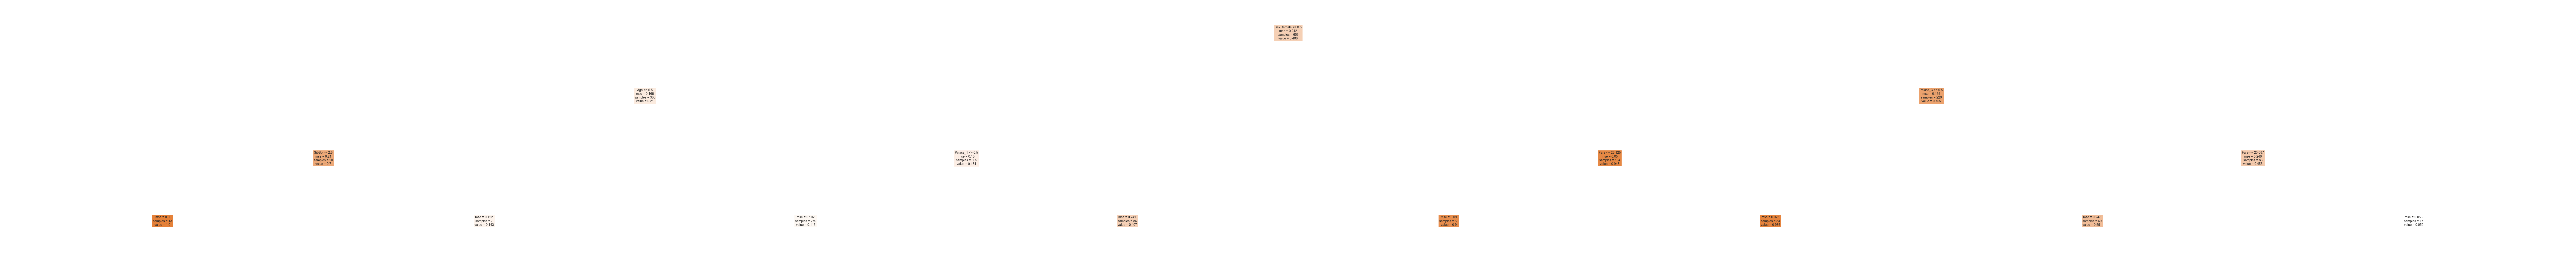

In [39]:
        
#Plotting the best Subset:
Responses_set.sort_values('Acc',inplace=True,ignore_index=True,ascending=False)
print(f'the best subset was:________')
print(f'{Responses_set.iloc[0]}')


## Rodando o Modelo:
reg = DecisionTreeRegressor(max_depth=Responses_set.iloc[0].max_depth, min_samples_leaf = Responses_set.iloc[0].min_samples_leaf)
reg.fit(X_train,y_train)

## Fazendo a Predição do Modelo:
y_pred = reg.predict(X_test)

### Plotando a árvore decisória
import matplotlib.pyplot as plt
from sklearn import tree
fig_name_save = "Árvore 1"
feature_names = list(X_test) #nome das categorias de X para serem plotadas


#plt.figure(figsize= 200,100)
plt.figure(figsize = (200,20));
tree.plot_tree(reg,filled=True, fontsize = 14, feature_names=feature_names)
plt.savefig(fig_name_save)

In [40]:
#getting the result:
result_rand_forest = pd.DataFrame( {'accuracy' : Responses_set.Acc.iloc[0] }, index = ['rand_forest'])
results = results.append(result_rand_forest)
results.head()

,accuracy
knn,0.813433
Log_regression,0.798347
rand_forest,0.403572


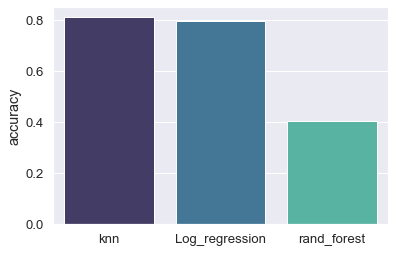

In [42]:
sns.barplot(x = results.index, y = results.accuracy, palette = "mako" );

## 4 - Kaggle - Preparing and sending model to kaggle

In [43]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
